<a id="recommendation-model"></a>
# 🍪 Bongrub's Recipe Recommendation Model


Implementing the recommender system for the Food.com's Food Recipe dataset obtained from Kaggle under the open source license.
Happy recommending! 😀



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle

The dataset has two csv files, 'recipes.csv' and 'reviews.csv'. 

The recipes dataset contains **522,517 recipes** from **312 different categories**. This dataset provides information about each recipe like cooking times, servings, ingredients, nutrition, instructions, and more.

The reviews dataset contains **1,401,982 reviews** from **271,907 different users**. This dataset provides information about the author, rating, review text, and more.

Now, that's a lot of information! Dataset size check ✅

Here is the [Dataset link](https://www.kaggle.com/datasets/irkaal/foodcom-recipes-and-reviews) for reference.

In [2]:
# Storing the recipes information into a pandas DataFrame titled 'recipes'
recipes = pd.read_csv('recipes.csv', engine='python', error_bad_lines=False)

C:\Users\CY\AppData\Local\Temp\ipykernel_4260\896337121.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  recipes = pd.read_csv('recipes.csv', engine='python', error_bad_lines=False)


In [3]:
# Storing the reviews information into a pandas DataFrame titled 'reviews'
reviews = pd.read_csv('reviews.csv', engine='python', error_bad_lines=False)

C:\Users\CY\AppData\Local\Temp\ipykernel_4260\212537898.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  reviews = pd.read_csv('reviews.csv', engine='python', error_bad_lines=False)


<a id="preprocessing-data"></a>
# 🍳 Preprocessing the Data 

## 🔍 Data Filtering and Imputation

### 📂 Recipes DataFrame

From whatever source is the data obtained, the very first step towards building a recommendation model is to pre-process the data first. Digging deeper into the data. 

In [4]:
# Checking the dataset
recipes.info(), recipes.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

(None, (522517, 28))

As the shape of recipes DataFrame shows it has 28 columns, which is too impressive. let us see what all labels we have for the columns.

In [5]:
# Checking the columns in recipes
recipes.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions'],
      dtype='object')

In [6]:
recipes.head(3)

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."


In [7]:
# As we can see some unexpectedly formatted data in columns, let's check 1st Recipe's Data
recipes.loc[0]

RecipeId                                                                     38
Name                                          Low-Fat Berry Blue Frozen Dessert
AuthorId                                                                   1533
AuthorName                                                               Dancer
CookTime                                                                  PT24H
PrepTime                                                                  PT45M
TotalTime                                                              PT24H45M
DatePublished                                              1999-08-09T21:46:00Z
Description                   Make and share this Low-Fat Berry Blue Frozen ...
Images                        c("https://img.sndimg.com/food/image/upload/w_...
RecipeCategory                                                  Frozen Desserts
Keywords                      c("Dessert", "Low Protein", "Low Cholesterol",...
RecipeIngredientQuantities              

Before diving into Data Pre-processing, we can make sure that we get rid of the data we do not need. So, let's filter it out.

We can remove columns like DatePublished(irrelevant detail), and RecipeYield(as it depends on servings required too) 
Getting rid of unwanted columns, we have our new recipes dataframe as 

In [8]:
# Removing TotalTime, DatePublished and RecipeYield columns
recipes = recipes[['RecipeId', 'Name', 'AuthorId', 'AuthorName', 
                   'CookTime', 'PrepTime', 'TotalTime', 'Description', 'Images', 
                   'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 
                   'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
                   'SaturatedFatContent', 'CholesterolContent', 'SodiumContent','CarbohydrateContent', 
                   'FiberContent', 'SugarContent', 'ProteinContent','RecipeServings', 'RecipeInstructions']]

In [9]:
# Checking dataframe's shape after removing 3 columns from 28 initial ones
recipes.shape

(522517, 26)

After filtering the data, it is noticeable that the data in columns like CookTime, PrepTime, TotalTime, Images, Keywords, RecipeIngredientQuantities, RecipeIngredientParts, RecipeInstructions need pre-processing.

The dataset used is designed to be in such a way that these list-columns values need to parsed in R but we can apply some of the Python library's powerful functions to do the work.
Before starting pre-processing, let's have a look at the data to get an idea of what pre-processing steps can be performed to make the data look cleaner, uniform and comprehensible.

In [10]:
recipes.CookTime[0], recipes.PrepTime[0], recipes.TotalTime[0]

('PT24H', 'PT45M', 'PT24H45M')

In [11]:
recipes.Images[0]

'c("https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/YUeirxMLQaeE1h3v3qnM_229%20berry%20blue%20frzn%20dess.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/AFPDDHATWzQ0b1CDpDAT_255%20berry%20blue%20frzn%20dess.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/UYgf9nwMT2SGGJCuzILO_228%20berry%20blue%20frzn%20dess.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/PeBMJN2TGSaYks2759BA_20140722_202142.jpg", \n"https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/picuaETeN.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/pictzvxW5.jpg")'

In [12]:
recipes.Keywords[0]

'c("Dessert", "Low Protein", "Low Cholesterol", "Healthy", "Free Of...", "Summer", "Weeknight", "Freezer", "Easy")'

In [13]:
recipes.RecipeIngredientQuantities[0]

'c("4", "1/4", "1", "1")'

In [14]:
recipes.RecipeIngredientParts[0]

'c("blueberries", "granulated sugar", "vanilla yogurt", "lemon juice")'

In [15]:
recipes.RecipeInstructions[0]

'c("Toss 2 cups berries with sugar.", "Let stand for 45 minutes, stirring occasionally.", "Transfer berry-sugar mixture to food processor.", "Add yogurt and process until smooth.", "Strain through fine sieve. Pour into baking pan (or transfer to ice cream maker and process according to manufacturers\' directions). Freeze uncovered until edges are solid but centre is soft.  Transfer to processor and blend until smooth again.", "Return to pan and freeze until edges are solid.", "Transfer to processor and blend until smooth again.", \n"Fold in remaining 2 cups of blueberries.", "Pour into plastic mold and freeze overnight. Let soften slightly to serve.")'

These need to be pre-processed. But let's first count the Null values so that we don't have to deal with the this problem later on.

In [16]:
# Function for counting Null values 
def countNullValues(col):
  c = 0
  for i in col:
    if(i != i):
      c+=1
  return c

In [17]:
# Firstly, checking Null value count in each column that needs formatting
a = countNullValues(recipes.CookTime)
b = countNullValues(recipes.PrepTime)
c = countNullValues(recipes.Images)
d = countNullValues(recipes.Keywords)
e = countNullValues(recipes.RecipeIngredientQuantities)
f = countNullValues(recipes.RecipeIngredientParts)
g = countNullValues(recipes.RecipeInstructions)
a, b, c, d, e, f, g

(82545, 0, 1, 17237, 3, 0, 0)

As there are a lot of Null values in the CookTime and Keywords columns, we have to find a way to deal with missing values. 

One way is to get rid of columns with missing values. But this would make the data lose too much of potential information. So, we would rather go with **Imputation**. It is a standard approach which **fills in the missing values** with some number. That number, in most cases, is the mean of all the values present in that column. But in our dataset, as the cooktime can't be estimated to be equal to the mean of other values and neither can a number fit in the keywords column, so we are just replacing null values with a "NA" string.

In [18]:
# Function for replacing Null Values
def replaceNullValue(column):
  j = 0
  for i in column:
    if(str(i) == 'nan'):
      column[j] = 'NA'
    j+=1
  return column

In [19]:
replaceNullValue(recipes.CookTime)

C:\Users\CY\AppData\Local\Temp\ipykernel_4260\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'


0         PT24H
1         PT25M
2          PT5M
3         PT20M
4         PT30M
          ...  
522512    PT35M
522513     PT3H
522514     PT3H
522515       NA
522516    PT25M
Name: CookTime, Length: 522517, dtype: object

In [20]:
countNullValues(recipes.CookTime)

0

Imputation for the Keywords columns along with other columns can be done along with formatting them in a single function to avoid code repitition.

### 💯 Reviews DataFrame

The reviews dataset has an impressive amount of **1,401,982 reviews** from **271,907 different usesr**. So let us see what all values we have for the first row in the reviews DataFrame! 

In [21]:
# Checking the column labels in reviews
reviews.columns, reviews.shape

(Index(['ReviewId', 'RecipeId', 'AuthorId', 'AuthorName', 'Rating', 'Review',
        'DateSubmitted', 'DateModified'],
       dtype='object'),
 (1401982, 8))

In [22]:
# Printing a summary of the data in reviews data
# .describe() gives the statistics of the numerical data 
reviews.describe()

,ReviewId,RecipeId,AuthorId,Rating
count,1.401982e+06,1.401982e+06,1.401982e+06,1.401982e+06
mean,8.179739e+05,1.526412e+05,1.558638e+08,4.407951e+00
std,5.280821e+05,1.301112e+05,5.305111e+08,1.272012e+00
min,2.000000e+00,3.800000e+01,1.533000e+03,0.000000e+00
25%,3.743862e+05,4.703875e+04,1.336800e+05,4.000000e+00
50%,7.717805e+05,1.093270e+05,3.305450e+05,5.000000e+00
75%,1.204126e+06,2.318768e+05,8.183590e+05,5.000000e+00
max,2.090347e+06,5.412980e+05,2.002902e+09,5.000000e+00


The count shows how many rows have non-missing values. 
As all the columns have equal number of non-missing values, it shows that the data is quite consistent
Let's take a look at the overview of the reviews DataFrame

In [23]:
reviews.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z,2000-01-25T21:44:00Z
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z,2001-10-17T16:49:59Z
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z,2000-02-25T09:00:00Z
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z,2000-03-13T21:15:00Z
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28T12:51:00Z,2000-03-28T12:51:00Z


Here, we have the first 5 rows from the reviews DataFrame. The 'date' format can be modified and could even be truncated for the initial model. 

In [24]:
# Truncating the DateSubmitted and DateModified columns
reviews=reviews[['ReviewId','RecipeId','AuthorId','AuthorName','Rating','Review']]

In [25]:
# Checking the shape of dataframe after truncating 2 columns from intial 8
reviews.shape

(1401982, 6)

In [26]:
# Counting null values in the reviews dataframe
c1 = countNullValues(reviews.ReviewId)
c2 = countNullValues(reviews.RecipeId) 
c3 = countNullValues(reviews.AuthorId)
c4 = countNullValues(reviews.AuthorName) 
c5 = countNullValues(reviews.Rating)
c6 = countNullValues(reviews.Review) 

As there are 214 Null values in reviews column here, we can reuse the function already written in the above subsection.

In [27]:
replaceNullValue(reviews.Review)

C:\Users\CY\AppData\Local\Temp\ipykernel_4260\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'


0               better than any you can get at a restaurant!
1          I cut back on the mayo, and made up the differ...
2          i think i did something wrong because i could ...
3          easily the best i have ever had.  juicy flavor...
4                                         An excellent dish.
                                 ...                        
1401977    I was disappointed. I couldn't wait to make th...
1401978    Nothing to drain. And I don’t heat up the liqu...
1401979    Good base recipe for someone to start with. I ...
1401980    Thank you so much for this amazing recipe! I l...
1401981    I can't say enough about this recipe.... the b...
Name: Review, Length: 1401982, dtype: object

In [28]:
countNullValues(reviews.Review)

0

So finally, we have no null values and the data is filtered too ✔

## 🥡 Formatting Data Values

### 📁 Recipes DataFrame

**CookTime**, **PrepTime** and **TotalTime** have data in the **ISO 8601 duration format**. They can simply be reformatted with a one-liner function available in Python. We just need to replace the initial 'PT' with ''. We do it by using **replace()** Method.

In [29]:
# Formatting CookTime and PrepTime
recipes.CookTime = recipes.CookTime.str.replace('PT', '')
recipes.PrepTime = recipes.PrepTime.str.replace('PT', '')
recipes.TotalTime = recipes.TotalTime.str.replace('PT', '')

Let's have a look at the formatting that has been performed uptill now. For reference, "2H" and "2M" indicates 2 Hours and 2 Minutes respectively. 


In [30]:
recipes.CookTime[0]

'24H'

For rest of the columns, I'll define a function which would return a list of the formatted values. We need a list for all the remaining columns except for RecipeInstructions. For that, we just need to store the recipe in a single string object. And hence, the function for it would differ. 

In [31]:
# Splitting data over '", "' and ignoring the starting 'c("' and ending '")' for all
# For NA values in keywords column, replacing it by "NA"
# For character(0) value in Images column, replacing it with "character(0)"
# Ignoring any "\n" occurrence, 
# For some special cases in Images column which begin with '"http' instead of more common'c("' and end normally instead of '")', 
# making it to read characters from 1st index(character h) only and ignoring just the last '"' by the if-else conditional
def reformatColumns(columnTitle):
  L = []
  for i in columnTitle:
    if(type(i) == str):
      i = i.replace("NA", '"NA"')
      i = i.replace("character(0)", 'c("character(0)")')
      i = i.replace("\n", "")
      if(i[0:5] == '"http'):
        L.append([i[1:-1]]) 
      else:
        L.append(i[3:-2].split('", "')) 
    else:
      L.append([])
  return L

In [32]:
# As there is no need of splitting, replacing some values and appending it to the list to be returned for each recipe
def reformatRecipe(recipe):
  L = []
  for i in recipe:
    i = i.replace("\n", "")
    i = i.replace('.", "', '. ')
    i = i.replace('c("', '')
    i = i.replace('")', '')
    L.append(i)
  return L

In [33]:
recipes.Images = reformatColumns(recipes.Images)

In [34]:
recipes.Images.head()

0    [https://img.sndimg.com/food/image/upload/w_55...
1    [https://img.sndimg.com/food/image/upload/w_55...
2    [https://img.sndimg.com/food/image/upload/w_55...
3    [https://img.sndimg.com/food/image/upload/w_55...
4    [https://img.sndimg.com/food/image/upload/w_55...
Name: Images, dtype: object

In [35]:
recipes.Keywords = reformatColumns(recipes.Keywords)

In [36]:
recipes.Keywords.head()

0    [Dessert, Low Protein, Low Cholesterol, Health...
1    [Chicken Thigh & Leg, Chicken, Poultry, Meat, ...
2    [Low Protein, Low Cholesterol, Healthy, Summer...
3    [Beans, Vegetable, Low Cholesterol, Weeknight,...
4    [Low Protein, Vegan, Low Cholesterol, Healthy,...
Name: Keywords, dtype: object

In [37]:
recipes.RecipeIngredientParts = reformatColumns(recipes.RecipeIngredientParts)

In [38]:
recipes.RecipeIngredientParts.head()

0    [blueberries, granulated sugar, vanilla yogurt...
1    [saffron, milk, hot green chili peppers, onion...
2    [sugar, lemons, rind of, lemon, zest of, fresh...
3    [extra firm tofu, eggplant, zucchini, mushroom...
4    [plain tomato juice, cabbage, onion, carrots, ...
Name: RecipeIngredientParts, dtype: object

In [39]:
recipes.RecipeIngredientQuantities = reformatColumns(recipes.RecipeIngredientQuantities)

In [40]:
recipes.RecipeIngredientQuantities.head()

0                                       [4, 1/4, 1, 1]
1    [1, 4, 2, 2, 8, 1/4, 8, 1/2, 1, 1, 1/4, 1/4, 1...
2                       [1 1/2, 1, NA, 1 1/2, NA, 3/4]
3    [12, 1, 2, 1, 10, 1, 3, 2, 2, 2, 1, 2, 1/2, 1/...
4                                     [46, 4, 1, 2, 1]
Name: RecipeIngredientQuantities, dtype: object

**A quick note** about recipe ingredients and their quantities data columns.

**RecipeIngredientQuantities** are as many as the **RecipeIngredientParts** with each ingredient's quantity described with respect to the 1st ingredient mentioned and is in **ratio-part formatting**. 

For ex, for first recipe, if we take **400 gms** of **blueberries**, then **granulated sugar** should be 1/16th of 400gms which is **25gms** and **vanilla yogurt** and **lemon juice** should be 1/4th of 400gms which is **100gms** each.

In [41]:
recipes.RecipeInstructions = reformatRecipe(recipes.RecipeInstructions)

In [42]:
recipes.RecipeInstructions.head()

0    Toss 2 cups berries with sugar. Let stand for ...
1    Soak saffron in warm milk for 5 minutes and pu...
2    Into a 1 quart Jar with tight fitting lid, put...
3    Drain the tofu, carefully squeezing out excess...
4    Mix everything together and bring to a boil. R...
Name: RecipeInstructions, dtype: object

After having formatted the recipes DataFrame, let's have a look over it.

In [43]:
# Let's have a look at the filtered DataFrame
# Checking 1st recipe's data values(formatted)
recipes.loc[0]

RecipeId                                                                     38
Name                                          Low-Fat Berry Blue Frozen Dessert
AuthorId                                                                   1533
AuthorName                                                               Dancer
CookTime                                                                    24H
PrepTime                                                                    45M
TotalTime                                                                24H45M
Description                   Make and share this Low-Fat Berry Blue Frozen ...
Images                        [https://img.sndimg.com/food/image/upload/w_55...
RecipeCategory                                                  Frozen Desserts
Keywords                      [Dessert, Low Protein, Low Cholesterol, Health...
RecipeIngredientQuantities                                       [4, 1/4, 1, 1]
RecipeIngredientParts         [blueberri

In [44]:
recipes.shape

(522517, 26)

### 💯 Reviews Dataframe

As the data looks quite clean, there's no formatting needed here! ✔

In [45]:
reviews.head(5)

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ..."
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...
4,14,44,2085,Tony Small,5,An excellent dish.


<a id="*analyzing*-data"></a>
# 🧠 Analyzing the Data

Analyzing the reviews matrix is of utmost importance while generating generalized recommendations. The model must know details about the patterns and behavior/trend present in the reviews and ratings data in order to generate intelligent recommendations. 

Here's some breif detail about the ratings and their density. Let's review the reviews DataFrame for better clarity of the ratings density matrix:







### 🔎 Reviews DataFrame Overview

In [46]:
# Finding minimum and maximum ratings
reviews['Rating'].min(), reviews['Rating'].max()

(0, 5)

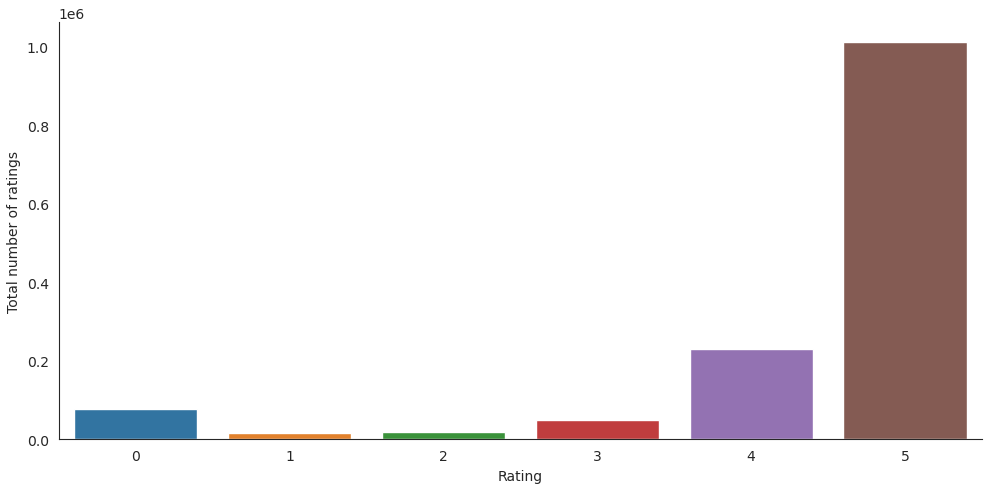

In [47]:
# Checking the Rating distribution in the range 0-5 for the Data given 
import seaborn as sns
with sns.axes_style('white'):
    g = sns.catplot(x="Rating", data=reviews, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [48]:
print("\nTotal no of ratings :", reviews.shape[0])
print("Total No of authors   :", len(np.unique(reviews.AuthorId)))
print("Total No of recipes  :", len(np.unique(reviews.RecipeId)))


Total no of ratings : 1401982
Total No of authors   : 271907
Total No of recipes  : 271678


A total of 272k users have rated 271k recipes. But we need to select the authors who have rated a significant number of recipes.

### 🥈 Selecting Authors

Using the groupby clause, checking how many times an author has rated the recipes and sorting them in descending order. This will help in selecting the authors who have atleast rated more than say, a 100 recipes.**bold text**

In [49]:
# Using groupby method to group authors based on their rating counts and sorting in descending order
reviews.groupby('AuthorId')['Rating'].count().sort_values(ascending=False)

AuthorId
424680        8842
37449         6605
383346        5438
128473        4693
169430        4586
              ... 
1505829          1
1505866          1
1505869          1
1505873          1
2002901938       1
Name: Rating, Length: 271907, dtype: int64

In [50]:
# To calcuate the density matrix, keeping only the authors who have rated more than 100 recipes
counts = reviews['AuthorId'].value_counts()
valueReviews = reviews[reviews['AuthorId'].isin(counts[counts >= 100].index)]
valueReviews.shape 

(652022, 6)

In [51]:
valueReviews.reset_index(inplace = True, drop = True)

In [52]:
valueReviews.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review
0,47,780,2312,Gay Gilmore,5,This was delicious.\r\n
1,53,51964,2312,Gay Gilmore,5,This dish was lovely. All my guests complimen...
2,66,3862,2312,Gay Gilmore,5,I added curry powder to jazz them up.
3,67,4397,2312,Gay Gilmore,5,Everyone loves it.\r\n
4,71,1232,2312,Gay Gilmore,4,"It was good, it just tasted a little too tomat..."


### 🗻 Pivoting the Rating Matrix 

The **pivot()** function produces pivot table based on 3 columns of the DataFrame. 

It uses unique values from index / columns and fills with values. The fillna() method replaces the NULL values with a specified value.

In [53]:
finalRatingsMatrix = valueReviews.pivot(index = 'AuthorId', columns ='RecipeId', values = 'Rating').fillna(0)
finalRatingsMatrix.shape

(1735, 208933)

In [54]:
# Shape of finalRatingMatrix can be verified as (indexes = unique values in 'AuthorId', and cols = unique values in RecipeId)
valueReviews['AuthorId'].value_counts().shape

(1735,)

In [55]:
valueReviews['RecipeId'].value_counts().shape

(208933,)

In [56]:
# Have a look at the final ratings matrix formed by the pivot function
finalRatingsMatrix

RecipeId,38,40,41,42,44,45,46,47,49,52,...,540590,540594,540622,540664,540682,540716,540717,540731,540876,541030
AuthorId,,,,,,,,,,,,,,,,,,,,,
1533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001102678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001112113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001297534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### ➗ Calculating Matrix Density

In [57]:
# Density of this matrix can be calculated by dividing the no. of ratings it has currently by the no. of ratings it could have had(its shape)
givenNumOfRatings = np.count_nonzero(finalRatingsMatrix)
givenNumOfRatings

640295

In [58]:
possibleNumOfRatings = finalRatingsMatrix.shape[0] * finalRatingsMatrix.shape[1]
possibleNumOfRatings

362498755

In [59]:
densityOfRatingsMatrix = (givenNumOfRatings/possibleNumOfRatings)
densityOfRatingsMatrix *= 100
print ('densityOfRatingsMatrix: {:4.2f}%'.format(densityOfRatingsMatrix))

densityOfRatingsMatrix: 0.18%


In [60]:
# finalRatingsMatrix has users as indices and products as columns.
# To get a matrix with one row per 'Recipe' and one column per 'Author'
finalRatingsMatrixAfterTranspose = finalRatingsMatrix.transpose()
finalRatingsMatrixAfterTranspose

AuthorId,1533,1535,2310,2312,3288,4291,4439,4470,4740,5060,...,2597942,1800054678,1802849661,2000431901,2000498330,2001102678,2001112113,2001297534,2001362355,2002256447
RecipeId,,,,,,,,,,,,,,,,,,,,,
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id="*popularity* -model "></a>
# ⚡ Popularity based Recommender

A baseline approach is the **Popularity based Recommender Model**. This model simply recommends the most popular recipes to the user that the user may/may not have previously consumed. As the popular recipes are **"popular"** for a reason, it usually provides good recommendations, generally interesting for most people.

This is a non-personalized model, which does not take into account an individual user's preferences but yes, it does take into account what other people around the world have a common liking for which makes the popular recipes get **trendy!** Higher is the probability that the user might like these suggestions. 

And guess what, these recipes would be **featured** on the home page of the application making sure that it caters to a new user coming on the application for the first time! ❇

### 🔺 Popular Recipes List

First step towards it would be to find the recipe(s) which has/have the highest number of ratings and reviews, basically the most loved and popular recipe among all present in the dataset.



In [61]:
# There is a possibility that there are more than one recipes which have got 5.0 rating individually. Checking them.
highestRatedRecipes = recipes.loc[(recipes.AggregatedRating) == 5.0] 
highestRatedRecipes.shape

(174516, 26)

There are almost 174k recipes with the highest rating. **Great!**

Checking for the most reviewed recipes(recipes with the highest number of reviews). There is a possibility that there are more than one recipes which have got the maximum number of reviews, i.e **3063**. Let's check that.

In [62]:
mostReviewedRecipe = recipes.loc[(recipes.ReviewCount) == 3063.0]
mostReviewedRecipe

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,Description,Images,RecipeCategory,...,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions
41924,45809,Bourbon Chicken,58278,LinMarie,20M,15M,35M,I searched and finally found this recipe on th...,[https://img.sndimg.com/food/image/upload/w_55...,Chicken Breast,...,24.5,6.5,145.3,1573.0,23.4,0.3,21.5,50.1,4.0,Editor's Note: Named Bourbon Chicken because ...


There's just one recipe which has the highest number of reviews individually. Definitely, it has to be the most popular one.
But finding some more popular ones to recommend. 

Using some inbuilt pandas functions, finding the most favorite(in terms of ratings) and most popular(in terms of reviews) recipes. 
sum() factor takes into account both the rating value factor(favoriteness) and the rating count factor(popularity). 
This is then sorted in descending order and top 10 fav and popular recipes are printed.

In [63]:
mostFavoriteAndPopularRecipeList = (reviews.groupby('RecipeId')[['Rating']].sum().sort_values('Rating', ascending=False).reset_index()) 
mostFavoriteAndPopularRecipeList = mostFavoriteAndPopularRecipeList.head(10) 
mostFavoriteAndPopularRecipeList

,RecipeId,Rating
0,45809,12478
1,2886,9204
2,27208,6911
3,39087,6767
4,89204,6689
5,35813,6003
6,67256,5879
7,22782,5631
8,54257,5582
9,32204,5553


In [64]:
# Looking at the top recipe in the list
recipes.loc[recipes['RecipeId'] == 45809]

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,Description,Images,RecipeCategory,...,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions
41924,45809,Bourbon Chicken,58278,LinMarie,20M,15M,35M,I searched and finally found this recipe on th...,[https://img.sndimg.com/food/image/upload/w_55...,Chicken Breast,...,24.5,6.5,145.3,1573.0,23.4,0.3,21.5,50.1,4.0,Editor's Note: Named Bourbon Chicken because ...


In [65]:
# Merging this with the recipes dataframe on 'RecipeId'(primary key) 
popularRecipes = pd.merge(mostFavoriteAndPopularRecipeList, recipes, on='RecipeId')

# Dropping the Rating column calculated temporarily as we have AggregatedRating column in the recipes DataFrame already.
popularRecipes.drop("Rating", axis = 1, inplace = True)


In [66]:
# Selecting the top 10 popular recipes based on their rating score
popularRecipes.head(10)

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,Description,Images,RecipeCategory,...,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions
0,45809,Bourbon Chicken,58278,LinMarie,20M,15M,35M,I searched and finally found this recipe on th...,[https://img.sndimg.com/food/image/upload/w_55...,Chicken Breast,...,24.5,6.5,145.3,1573.0,23.4,0.3,21.5,50.1,4.0,Editor's Note: Named Bourbon Chicken because ...
1,2886,Best Banana Bread,1762,lkadlec,1H,10M,1H10M,Make and share this Best Banana Bread recipe f...,[https://img.sndimg.com/food/image/upload/w_55...,Quick Breads,...,10.5,6.2,61.6,338.3,42.5,1.4,24.4,3.7,10.0,Remove odd pots and pans from oven. Preheat ov...
2,27208,To Die for Crock Pot Roast,28201,yooper,9H,5M,9H5M,"Amazing flavor, and so simple! No salt needed ...",[https://img.sndimg.com/food/image/upload/w_55...,One Dish Meal,...,9.7,3.9,149.8,380.6,2.6,0.1,0.0,49.5,8.0,Place beef roast in crock pot. Mix the dried m...
3,39087,Creamy Cajun Chicken Pasta,30534,Lorac,15M,10M,25M,Make and share this Creamy Cajun Chicken Pasta...,[https://img.sndimg.com/food/image/upload/w_55...,Chicken Breast,...,41.1,24.0,198.6,816.8,47.4,2.5,3.1,39.3,2.0,Place chicken and Cajun seasoning in a bowl an...
4,89204,Crock-Pot Chicken With Black Beans &amp; Cream...,137839,Jen Santiago,4H,3M,4H3M,I love this Crock-Pot chicken recipe for two r...,[https://img.sndimg.com/food/image/upload/w_55...,One Dish Meal,...,35.0,15.2,155.3,913.4,50.1,11.2,9.9,45.9,4.0,"Take 4-5 frozen, yes, frozen, boneless chicken..."
5,35813,Oatmeal Raisin Cookies,8688,Bev I Am,11M,15M,26M,"You've made oatmeal-raisin cookies before, so ...",[https://img.sndimg.com/food/image/upload/w_55...,Drop Cookies,...,6.4,3.5,23.9,117.1,30.3,1.8,15.1,3.5,36.0,Preheat oven to 350°. Whisk dry ingredients; s...
6,67256,Best Ever Banana Cake With Cream Cheese Frosting,82367,Rhonda J,1H,15M,1H15M,This is one of (if not) the BEST banana cake I...,[https://img.sndimg.com/food/image/upload/w_55...,Dessert,...,20.6,12.3,89.5,365.4,75.7,1.0,55.7,5.5,16.0,Preheat oven to 275°F (135C). Grease and flour...
7,22782,Jo Mama's World Famous Spaghetti,25455,SharleneW,1H,20M,1H20M,My kids will give up a steak dinner for this s...,[https://img.sndimg.com/food/image/upload/w_55...,Spaghetti,...,26.3,9.0,51.8,2058.6,50.1,3.8,11.4,29.8,NaN,"In large, heavy stockpot, brown Italian sausag..."
8,54257,"Yes, Virginia There is a Great Meatloaf",24670,Nita Holleman,1H,20M,1H20M,Absolutely delicious meatloaf and sauce! Those...,[https://img.sndimg.com/food/image/upload/w_55...,Meatloaf,...,28.1,11.0,165.2,1260.5,23.2,0.4,18.9,35.5,NaN,Meatloaf: Combine meat loaf ingredients and pl...
9,32204,&quot;Whatever Floats Your Boat&quot; Brownies!,37305,Karen..,25M,10M,35M,"These are absolutely the chewiest, moistest, f...",[https://img.sndimg.com/food/image/upload/w_55...,Bar Cookie,...,20.0,10.2,40.3,189.3,52.0,3.4,40.4,6.1,16.0,Preheat oven to 350°F. Grease an 8 inch square...


We now have our popular recipes in the 'popularRecipes' list. 

**Milestone 1 achieved ✔** (Exciting!)

### 🏋 Weighted Rating Method

Using a Mathematical method to find the most popular recipes. This is known as the **Weighted Rating Method**. 

Weighted Rating (WR) = $(\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$

where,
* *v* is the number of ratings for the recipe
* *m* is the minimum ratings required to be listed in the chart of recipes that are considered
* *R* is the average rating of the recipe
* *C* is the mean of aggregate ratings of all the recipes

The next step is to determine an appropriate value for *m*, the minimum rating count required to be listed in the chart. We will use **99th percentile** as our cutoff. In other words, for a recipe to feature in the charts, it must have more ratings than at least 99% of the recipes in the list.

Building an overall Top 250 Chart and will define a function to build charts for a particular category of recipe. Let's begin!

In [67]:
# Calculating the ratings given per recipe
RatingCounts = reviews.groupby('RecipeId')['Rating'].count()
RatingCounts.sort_values(ascending=False, inplace=True)
RatingCounts

RecipeId
45809     2892
2886      2182
27208     1614
89204     1584
39087     1491
          ... 
268939       1
268938       1
76088        1
76089        1
541298       1
Name: Rating, Length: 271678, dtype: int64

In [68]:
# Finding the mean rating value for a recipe
RatingAverages = recipes[recipes['AggregatedRating'].notnull()]['AggregatedRating'].astype('int')
C = RatingAverages.mean()
C

4.559496312580302

In [69]:
# Calculating the mininum number of ratings a recipe needs to have in order to be in the top 99 percentile of recipes
m = RatingCounts.quantile(0.99)
m

51.0

In [70]:
# Creating and merging smaller recipes dataframe with individual rating counts for a recipe
recipesSubDataFrame = recipes.iloc[:9000]
weightedPopularRecipes = recipesSubDataFrame.merge(RatingCounts, on='RecipeId')

In [71]:
# Shape of smaller recipes DataFrame 
weightedPopularRecipes.shape

(6662, 27)

In [72]:
# Recipes are shortlisted based on the condition that they have a minimum of "m" no. of ratings, with obvious non-null value in both rating and aggregated rating column
# Columns selected to appear in shortlisted dataframe are RecipeId, Name, RecipeCategory, AggregatedRating, Rating, and ReviewCount
qualifiedRecipes = weightedPopularRecipes[(weightedPopularRecipes['Rating'] >= m) & (weightedPopularRecipes['Rating'].notnull()) & (weightedPopularRecipes['AggregatedRating'].notnull())][['RecipeId', 'Name', 'RecipeCategory', 'AggregatedRating', 'Rating', 'ReviewCount']]

# Setting the datatype of 'Rating' and 'AggregatedRating' to int
qualifiedRecipes['Rating'] = qualifiedRecipes['Rating'].astype('int')
qualifiedRecipes['AggregatedRating'] = qualifiedRecipes['AggregatedRating'].astype('int')  

In [73]:
qualifiedRecipes.shape

(236, 6)

Therefore, to qualify to be considered for the top recipes chart, a recipe has to have at least **51 ratings**. We also see that the average rating for a recipe is **4.56** on a scale of 5. A total of **236** recipes qualify to be on the top chart.

In [74]:
# Function that defines the mathematical formula for the weighted rating method
def weightedRating(x):
    v = x['Rating']
    R = x['AggregatedRating']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [75]:
# Applying the WR function
qualifiedRecipes['wr'] = qualifiedRecipes.apply(weightedRating, axis=1)

# Sorting the list in descending order based on the WR score
qualifiedRecipes = qualifiedRecipes.sort_values('wr', ascending=False)

In [76]:
with open('qualifiedRecipes.pkl', 'wb') as f:
    pickle.dump(qualifiedRecipes, f)

In [77]:
qualifiedRecipes

,RecipeId,Name,RecipeCategory,AggregatedRating,Rating,ReviewCount,wr
1109,2886,Best Banana Bread,Quick Breads,5,2182,2273.0,4.989939
5542,10744,Delicious Chicken Pot Pie,Savory Pies,5,739,764.0,4.971562
2467,5170,Pete's Scratch Pancakes,Breakfast,5,699,722.0,4.970046
4597,9351,Sour Cream Banana Bread,Quick Breads,5,607,628.0,4.965858
2169,4627,Chicken Tortilla Soup II,Clear Soup,5,594,632.0,4.965169
...,...,...,...,...,...,...,...
2663,5478,Easy Garlic Chicken,Chicken Breast,4,168,181.0,4.130294
4316,8972,Waldorf-Astoria Red Velvet Cake,Dessert,4,196,198.0,4.115524
6019,11345,Grandma's Soft Sugar Cookies,Drop Cookies,4,225,235.0,4.103385
4864,9836,Slow-Cooker Cheesy Chicken,Chicken Breast,4,369,382.0,4.067939


We see that the top recommendations given by the weighted ratings method is very similar to the previously calculated popularity model. Hence, we have our list of the most popular recipes 😛

### ✨ Category Based Popularity Model

Let us now construct our function that builds charts for category based recipes. For this, we will relax our default conditions to the 85th percentile instead of 99.

In [78]:
# Checking out the categories we have in out dataset 
recipes['RecipeCategory']

0         Frozen Desserts
1          Chicken Breast
2               Beverages
3                Soy/Tofu
4               Vegetable
               ...       
522512            Dessert
522513     Very Low Carbs
522514          Ice Cream
522515           Canadian
522516          Breakfast
Name: RecipeCategory, Length: 522517, dtype: object

In [79]:
recipes.RecipeCategory.value_counts().head(30)

Dessert            62072
Lunch/Snacks       32586
One Dish Meal      31345
Vegetable          27231
Breakfast          21101
Beverages          16076
Chicken            13249
Meat               13131
Breads             12804
Pork               12603
Sauces             12166
Chicken Breast     11282
Potato             10870
Quick Breads       10387
< 60 Mins           9719
< 30 Mins           9020
Cheese              8462
Pie                 7775
Bar Cookie          7029
Low Protein         6663
< 15 Mins           6662
Drop Cookies        6385
Stew                5679
Yeast Breads        5523
Beans               5463
Candy               5229
Salad Dressings     5066
< 4 Hours           4969
Frozen Desserts     4804
Spreads             4694
Name: RecipeCategory, dtype: int64

In [80]:
recipes.iloc[:9001].RecipeCategory.value_counts().head(20)

Dessert           1113
Vegetable          629
Lunch/Snacks       560
Pie                374
Meat               312
Breads             289
Chicken            282
< 15 Mins          247
Pork               245
One Dish Meal      211
Beverages          211
Potato             201
Chicken Breast     201
Quick Breads       195
Breakfast          175
Cheese             163
Bar Cookie         160
Sauces             152
Low Protein        138
Candy              137
Name: RecipeCategory, dtype: int64

In [81]:
# category based popularity model - dumping weightedPopularRecipes 
category = weightedPopularRecipes.apply(lambda x: pd.Series(x['RecipeCategory']),axis=1).stack().reset_index(level=1, drop=True)
category.name = 'Category'
categoryBasedRecommender = weightedPopularRecipes.drop('RecipeCategory', axis=1).join(category)

# deserialize object
with open('categoryBasedRecommender.pkl', 'wb') as f:
    pickle.dump(categoryBasedRecommender, f)

In [82]:
# Function that takes in an input of the category, creates a smaller dataset based on that category, performs the weighted rating method and returns the qualified recipes 
# with their weighted rating score sorted in descending order
def categoricalRecipes(RecipeCategory, percentile=0.85):
    categorySpecificRecipes = categoryBasedRecommender[categoryBasedRecommender['Category'] == RecipeCategory]
    RatingCounts = categorySpecificRecipes[categorySpecificRecipes['Rating'].notnull()]['Rating'].astype('int')
    RatingAverages = categorySpecificRecipes[categorySpecificRecipes['AggregatedRating'].notnull()]['AggregatedRating'].astype('int')
    C = RatingAverages.mean()
    m = RatingCounts.quantile(percentile)
    
    qualified = categorySpecificRecipes[(categorySpecificRecipes['Rating'] >= m) & (categorySpecificRecipes['Rating'].notnull()) & (categorySpecificRecipes['AggregatedRating'].notnull())]
    [['RecipeId', 'Name', 'Rating', 'AggregatedRating', 'ReviewCount']]
    qualified['Rating'] = qualified['Rating'].astype('int')
    qualified['AggregatedRating'] = qualified['AggregatedRating'].astype('int')

    qualified['wr'] = qualified.apply(lambda x: (x['Rating']/(x['Rating']+m) * x['AggregatedRating']) + (m/(m+x['Rating']) * C), axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(12)
    
    return qualified  

In [83]:
categoricalRecipes('Dessert')

C:\Users\CY\AppData\Local\Temp\ipykernel_4260\4171406812.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['Rating'] = qualified['Rating'].astype('int')
C:\Users\CY\AppData\Local\Temp\ipykernel_4260\4171406812.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['AggregatedRating'] = qualified['AggregatedRating'].astype('int')
C:\Users\CY\AppData\Local\Temp\ipykernel_4260\4171406812.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,Description,Images,Keywords,...,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,Rating,Category,wr
860,2496,Dark Chocolate Cake,1535,Marg CaymanDesigns,50M,10M,1H,While it takes slightly longer to prepare this...,[https://img.sndimg.com/food/image/upload/w_55...,"[< 60 Mins, For Large Groups, Oven]",...,252.4,30.9,1.4,20.1,2.8,NaN,Heat oven to 350°F. Grease and flour two 9 inc...,520,Dessert,4.986927
5170,10269,Peanut Butter Cookies,12491,Christine,12M,10M,22M,I've been baking these since I was a little gi...,[https://img.sndimg.com/food/image/upload/w_55...,"[Lunch/Snacks, Cookie & Brownie, Fruit, Nuts, ...",...,126.4,14.7,0.5,9.1,2.3,NaN,Preheat oven to 375º. Mix first six ingredient...,388,Dessert,4.982613
4962,9989,Lemon Bars,10404,Diana Adcock,50M,20M,1H10M,Make and share this Lemon Bars recipe from Foo...,[https://img.sndimg.com/food/image/upload/w_55...,"[Weeknight, Oven, < 4 Hours]",...,262.2,85.3,1.0,57.7,7.0,NaN,For the base mix the butter into the flour and...,279,Dessert,4.976100
4468,9160,Rice Pudding,9690,Cheryl E,55M,5M,1H,Make and share this Rice Pudding recipe from F...,[https://img.sndimg.com/food/image/upload/w_55...,"[Lunch/Snacks, Medium Grain Rice, Rice, Low Pr...",...,507.2,131.6,1.0,74.7,20.2,NaN,"Bring rice, water and salt to a boil over med-...",228,Dessert,4.971021
6356,11763,Easy Lemon Pound Cake,17721,jean1,1H,10M,1H10M,I have used this cake for so many different th...,[https://img.sndimg.com/food/image/upload/w_55...,"[Kid Friendly, Sweet, Weeknight, Oven, < 4 Hours]",...,245.5,50.9,0.7,31.6,4.7,8.0,Mix together 1 cup sugar and butter. Add eggs ...,158,Dessert,4.959089
1566,3595,Better Than Sex Cake IIi,1758,Paul K. Lago,35M,15M,50M,It is my understanding that there are a variet...,[https://img.sndimg.com/food/image/upload/w_55...,"[< 60 Mins, For Large Groups, Oven, Easy]",...,349.1,50.1,0.9,20.1,4.3,24.0,Preheat oven to 350°F. Grease and lightly flou...,131,Dessert,4.951364
4532,9240,Chocolate Eclair Dessert,9453,Pearz,NA,20M,20M,Make and share this Chocolate Eclair Dessert r...,[https://img.sndimg.com/food/image/upload/w_55...,"[Kid Friendly, Potluck, Summer, < 30 Mins, No ...",...,336.1,70.4,1.7,43.9,6.3,NaN,Mix together vanilla pudding mix and milk. Fol...,129,Dessert,4.950674
3092,7118,Blueberry Boy Bait,146310,CoffeeMom,50M,10M,1H,Make and share this Blueberry Boy Bait recipe ...,[https://img.sndimg.com/food/image/upload/w_55...,"[Berries, Fruit, < 60 Mins, Oven]",...,550.7,68.6,1.7,41.3,6.2,8.0,"Mix together flour, sugar, & butter. Reserve 3...",128,Dessert,4.950322
4150,8754,Sweet Peanut Butter Cookies,7673,Rachel Merrell,12M,20M,32M,Make and share this Sweet Peanut Butter Cookie...,[https://img.sndimg.com/food/image/upload/w_55...,"[Cookie & Brownie, < 60 Mins, For Large Groups...",...,138.8,16.2,0.7,9.4,3.1,24.0,In medium mixing bowl beat together peanut but...,121,Dessert,4.947707
2594,5365,Pumpkin Cream Cheese Roll,2178,troyh,15M,40M,55M,Make and share this Pumpkin Cream Cheese Roll ...,[https://img.sndimg.com/food/image/upload/w_55...,"[Cheese, Tex Mex, Southwestern U.S., Winter, <...",...,376.1,52.3,1.1,41.4,5.6,8.0,"In a large bowl, beat eggs and sugar. Beat in ...",110,Dessert,4.942993


In [84]:
# Finding popular 'Breakfast' items
popularDesserts = categoricalRecipes('Breakfast').head()
popularDesserts

C:\Users\CY\AppData\Local\Temp\ipykernel_4260\4171406812.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['Rating'] = qualified['Rating'].astype('int')
C:\Users\CY\AppData\Local\Temp\ipykernel_4260\4171406812.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['AggregatedRating'] = qualified['AggregatedRating'].astype('int')
C:\Users\CY\AppData\Local\Temp\ipykernel_4260\4171406812.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,Description,Images,Keywords,...,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,Rating,Category,wr
2467,5170,Pete's Scratch Pancakes,1634,Bill Hilbrich,5M,15M,20M,It was the Fall of 1987 when Pete Nyhus walked...,[https://img.sndimg.com/food/image/upload/w_55...,"[High In..., Brunch, < 30 Mins, Easy]",...,334.9,28.1,0.8,4.3,5.9,NaN,Mix the dry items first. Combine the eggs and ...,699,Breakfast,4.987161
4383,9054,Leftover Mashed Potato Pancakes,8381,Thomas Danler,30M,5M,35M,This recipe was recently submitted to a news g...,[https://img.sndimg.com/food/image/upload/w_55...,"[Potato, Vegetable, Healthy, Hanukkah, < 60 Mi...",...,670.0,49.0,3.6,3.3,8.8,2.0,"Mix mashed potatoes, egg, flour, salt, pepper,...",131,Breakfast,4.936344
1419,3370,French Toast II,1760,Cheryl Thebeau-Blev,15M,10M,25M,Here's the way French Toast has been made in m...,[https://img.sndimg.com/food/image/upload/w_55...,[30 Min],...,218.1,32.1,2.1,25.7,18.7,NaN,Whisk the eggs till frothy. Add remaining ingr...,84,Breakfast,4.905341
6141,11492,Apple Butter,13067,Brenda Hall,17H40M,1H,18H40M,This is a very easy recipe to make and has alw...,[https://img.sndimg.com/food/image/upload/w_55...,"[Apple, Fruit, Low Protein, Vegan, Low Cholest...",...,12.0,137.1,0.7,135.4,0.1,NaN,"Peel, core and slice enough apples to fill a 4...",59,Breakfast,4.872243
352,519,Spicy Hash Browns - Homemade,1773,Malarkey Test,30M,15M,45M,Make and share this Spicy Hash Browns - Homema...,[https://img.sndimg.com/food/image/upload/w_55...,"[Potato, Vegetable, Low Protein, Vegan, Low Ch...",...,247.7,41.3,4.0,1.9,3.9,5.0,Preheat oven to 400 degrees Fahrenheit. Combin...,49,Breakfast,4.851470


Our category based popular recommendation model is working well. Rest categories are for you to try out! 😀

<a id="*content*-model"></a>
# 🍵 Content based Recommender 

The recommender we built in the previous section suffers some severe limitations. It gives the same recommendation to everyone, regardless of the user's personal taste. It is also calculating the recommendable recipes from the static dataset. It is planned to add a feature of adding one's own recipes to the dataset to make the application more interactive. 

To help provide personalization for our recommendations, I am going to build an engine that computes similarity between recipes based on certain metrics and suggests recipes that are most similar to a particular recipe that a user liked. Since, we will be using recipe metadata to build this engine, this also known as **Content Based Filtering.**

There are two methods of recommending based on content:


*   **Vector Space Model**
*   Decision Tree Classification

I have chosen vector space model as it is better in terms of complexity, efficiency and accuracy. 


I will build **3 Content Based Engines** based on:
* Recipe Name, Description and Keywords
* Recipe Ingredients, Category and Total Time(Cook & Prep)
* Improved Recommendation Engine(considers Ratings and Reviews too)

Also, I will be using a subset of all the recipes available to us due to limiting computing power available to me. Given that the original dataset it large enough, taking a chunk of it (9000 recipes) is also a good amount of data to suggest. 

### ☕ Recipe Name, Description and Keywords Based Recommender

For our dataset to have non-empty/non NaN values for the decription and keywords, we check each column(Name, RecipeId, Description, and Keywords)  and drop rows where the data is empty

In [85]:
# Using the same dataset as used for calculating popular recipes and dropping out unavailable values
descriptionDataset = weightedPopularRecipes
descriptionDataset.dropna(subset=['Name', 'RecipeId', 'Description', 'Keywords' ], inplace=True)
descriptionBasedRecommender = descriptionDataset.iloc[:9000]

Due to limited computing power, taking 5% of the recipes data in the compressedRecipes dataset as recipes is huge and clutters the memory, hindering the functioning of cosine similarity function. 




In [86]:
descriptionBasedRecommender.Description[0]

'Make and share this Low-Fat Berry Blue Frozen Dessert recipe from Food.com.'

In [87]:
# Making sure that the Null values in Description become empty 
descriptionBasedRecommender['Description'] = descriptionBasedRecommender['Description'].fillna('')

In [88]:
descriptionBasedRecommender.Keywords[0]

['Dessert',
 'Low Protein',
 'Low Cholesterol',
 'Healthy',
 'Free Of...',
 'Summer',
 'Weeknight',
 'Freezer',
 'Easy']

In [89]:
# To convert list items of Keywords column to string, this is the function
def listToString(column):   
  strr = " "  
  strr = strr.join(column)
  strr = " " + strr
  strr = strr + " "
  return strr

In [90]:
descriptionBasedRecommender.Keywords.apply(listToString)

0        Dessert Low Protein Low Cholesterol Healthy F...
1        Chicken Thigh & Leg Chicken Poultry Meat Asia...
2        Low Protein Low Cholesterol Healthy Summer < ...
3        Beans Vegetable Low Cholesterol Weeknight Bro...
4        Low Protein Vegan Low Cholesterol Healthy Win...
                              ...                        
6657     Chicken Breast Chicken Poultry Meat Weeknight...
6658     White Rice Poultry Rice Black Beans Beans Veg...
6659                    Thanksgiving < 60 Mins Oven Easy 
6660     Strawberry Berries Fruit Kid Friendly Weeknig...
6661     Potato Vegetable Kid Friendly Spring Winter <...
Name: Keywords, Length: 6659, dtype: object

In [91]:
descriptionBasedRecommender.Keywords = descriptionBasedRecommender.Keywords.apply(listToString)

In [92]:
# Merging the description column with all the words from name, description and keywords column to create a an overall description tag
descriptionBasedRecommender['Description'] = descriptionBasedRecommender['Description'] + descriptionBasedRecommender['Keywords']
descriptionBasedRecommender['Description'] = descriptionBasedRecommender['Description'] + descriptionBasedRecommender['Name']

Now that we have the data dump in the description column, we will use the **Cosine Similarity** method to find the similarity between different vectors created by using the **TfidfVectorizer** and **CountVectorizer** library.

*   Term frequency-inverse document frequency is a text vectorizer that
transforms the text into a usable vector

*   Countvectorizer is a method to convert text to numerical data. It gives equal weightage to all words.


TfidfVectorizer and CountVectorizer both are methods for converting text data into vectors as model can process only numerical data.

In CountVectorizer we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently.

To overcome this , we use TfidfVectorizer .

In TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.




In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer   

*   Tfidf vectorizer converts a collection of raw documents to a matrix of TF-IDF features.
*   analyzer takes in input based on whether the feature should be made of word or character n-grams.
*   ngram_range - The lower and upper boundary of the range of n-values for different n-grams to be extracted. 
*   All values of n such that min_n <= n <= max_n will be used. 

In [94]:
termFrequency = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')

In [95]:
tfidfMatrix = termFrequency.fit_transform(descriptionBasedRecommender['Description'])

We have now vectorized the descriptions column. Now, we need to find the similarity between these vectorized words. One way of doing it is by using cosine similarity. 

#### Cosine Similarity

We will use the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two recipes. Mathematically, it is defined as follows:

$cosine(x,y) = \frac{x. y^\intercal}{||x||.||y||} $

Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's **linear_kernel** instead of cosine_similarities since it is much faster.

In [96]:
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [97]:
cosineSimilarity = linear_kernel(tfidfMatrix, tfidfMatrix)

In [98]:
cosineSimilarity[0]

array([1.        , 0.01147054, 0.03266853, ..., 0.00160876, 0.06854029,
       0.0012838 ])

We now have a pairwise cosine similarity matrix for all the recipes in our dataset. The next step is to write a function that returns the 30 most similar recipes based on the cosine similarity score.


In [99]:
descriptionBasedRecommender = descriptionBasedRecommender.reset_index()
names = descriptionBasedRecommender['Name'] 
indices = pd.Series(descriptionBasedRecommender.index, index=descriptionBasedRecommender['Name'])

In [100]:
# This is important to keep a note of as there can be many recipes with the same name in the dataset.
descriptionBasedRecommender.Name.value_counts()

Shepherd's Pie        5
Banana Bread          4
Bran Muffins          4
Bread Pudding         4
Spanakopita           3
                     ..
Pork Cutlets          1
San Fernando Beans    1
Steak Tartare         1
Corn Ball Fritters    1
Hearty Potato Soup    1
Name: Name, Length: 6458, dtype: int64

In [101]:
def getRecommendations(title):
    idx = indices[title]

    # enumerating the array object given by cosin_sim and then storing the enumerated object as a list
    # index is index and then value is the cosine similarity score
    similarityScores = list(enumerate(cosineSimilarity[idx]))

    # sorting the list with key as cosine similarity in descending order
    similarityScores = sorted(similarityScores, key=lambda x: x[1], reverse=True)
    similarityScores = similarityScores[1:31]
    recipeIndices = [i[0] for i in similarityScores]
    return names.iloc[recipeIndices]

In [102]:
getRecommendations('Biryani').head(10)

3875              Chicken Biryani II
3429              Chicken Scaloppine
4537                  Butter Chicken
947        Teriyaki Chicken W/pecans
1247                 Chicken Biryani
4270    Easiest Black Pepper Chicken
1359        Slow Cooker Chicken Stew
4315                  Butter Chicken
509            Indian Spiced Chicken
3014               Chicken Curry III
Name: Name, dtype: object

In [103]:
getRecommendations('Best Lemonade').head(10)

4973                              Lemon Zest
332                                 Lemonade
5232                  Best Pickled Jalapenos
5654                     Best Marinara Sauce
843                        Cucumber Lemonade
1861                     Best Chocolate Cake
3987    Baked Acorn Squash &amp; Brown Sugar
2592                    Citrus-Scented Sugar
664                      Strawberry Lemonade
3150                   Stuffed Summer Squash
Name: Name, dtype: object

In [104]:
getRecommendations('Low-Fat Berry Blue Frozen Dessert').head(10)

1967       Low-Fat Berry Good Smoothie
4191                Low Fat Mayonnaise
508                 Low-Fat Fudge Bars
818                 Low-Fat Apple Cake
2479     Diabetic, Low-Fat Pumpkin Pie
3911    Hazel's Frozen Strawberry Cake
505            Low-Fat Blueberry Grunt
1862                  Low-Fat Carnitas
3413             Carrot Cake (Low Fat)
276                  Frozen Cappuccino
Name: Name, dtype: object

In [105]:
# getRecommendations('Banana Bread').head(10)

There is one problem with this function. It does properly recommend for the values where the dataset has only one instance of that recipe, but
it won't work for recipes which have multiple instances in the dataset.
For example, if we run this for "**Banana Bread**", it would result in an error as the index value which it finds for it from the indices dataframe is not unique, it's a list and hence, gets the error. 

ValueError: The truth value of an array with more than one element is ambiguous.

💡 - **Solution** to this could be to fetch the indices of all the occurences of the given recipe name in a list and iterate over it to calculate the similarity score. And as when the recipe name is same, they would have the most similarity,(which is even visible in the generated recommendations of the recipe with 1st index), we can safely return that list after everything has been calculated.

In [106]:
from collections.abc import Iterable

In [107]:
def getDescriptionBasedRecommendations(title):
    idx = indices[title]
    if isinstance(idx, Iterable):
      # looping through the idx list in case of a recipe name with more than one instance
      for i in idx:  
        
        # enumerating the array object given by cosin_sim and then storing the enumerated object as a list
        # index is index and then value is the cosine similarity score
        similarityScores = list(enumerate(cosineSimilarity[i]))

        # sorting the list with key as cosine similarity in descending order
        similarityScores = sorted(similarityScores, key=lambda x: x[1], reverse=True)

        # selecting the top 30 scorers
        similarityScores = similarityScores[1:31]

        recipeIndices = [i[0] for i in similarityScores]

        # returning just the list of the 1st in idx list as this would pretty much include all similar ones 
        return names.iloc[recipeIndices] 
    else:
      # enumerating the array object given by cosin_sim and then storing the enumerated object as a list
      # index is index and then value is the cosine similarity score
      similarityScores = list(enumerate(cosineSimilarity[idx]))

      # sorting the list with key as cosine similarity in descending order
      similarityScores = sorted(similarityScores, key=lambda x: x[1], reverse=True)
      similarityScores = similarityScores[1:31]
      recipeIndices = [i[0] for i in similarityScores]
      return names.iloc[recipeIndices]

In [108]:
getDescriptionBasedRecommendations('Banana Bread').head(10)

4596                     Banana Bread
4594          Sour Cream Banana Bread
1108                  Banana Bread II
1109                Best Banana Bread
4364          Sour Cream Banana Bread
4577      Chocolate Chip Banana Bread
846                        Pear Bread
643     Perfectly Spiced Banana Bread
5177                   Zucchini Bread
4478                   Banana Muffins
Name: Name, dtype: object

We're all set ✌. Let us now try and get the top recommendations for a few recipes and see how good the recommendations are.

In [109]:
getDescriptionBasedRecommendations('Sweet Potato Casserole').head(10)

6481                Sweet Potato Casserole
6229                Sweet Potato Casserole
2004             Sweet Potato Casserole II
5977                      Potato Casserole
3937      Grandma's Sweet Potato Casserole
2233            Sweet Potato Casserole III
2248             Sweet Potato Casserole IV
2513                 Easy Potato Casserole
1992    Sweet Potato and Apricot Casserole
709                  Easy Sweet Potato Pie
Name: Name, dtype: object

This is recommending recipes based on the description dump that we created, which contains Recipe Name, Description and Keywords. Let us build another engine to recommend based on the recipe ingredients, category and the time it takes to prepare. 

### ⏰ Metadata Based Recommender

For this engine, we would again use Count Vectorizer to create the count matrix as we did in the Description Recommender. We use the vector space method to create a metadata dump, then calculate cosine similarities and return recipes that are most similar to a given recipe.

To build our standard metadata based content recommender, we will need to prepare our dataset. Let us prepare this data as our first step. We need RecipeIngredients, RecipeCategory and TotalTime(Cook & Prep) columns from our original dataset. 

As we had the similar sized dataset for the description based recommender too, we can take that size here too. 

In [110]:
# Metadata based recommender model
metadataBasedRecommender = descriptionBasedRecommender

In [111]:
metadataBasedRecommender['Metadata'] = metadataBasedRecommender['RecipeCategory']

In [112]:
# Making sure that the Null values in Metadata become empty 
metadataBasedRecommender['Metadata'] = metadataBasedRecommender['Metadata'].fillna('')

We need to convert RecipeIngredients to string as done in last engine. Reusing that function here 

In [113]:
metadataBasedRecommender.RecipeIngredientParts = metadataBasedRecommender.RecipeIngredientParts.apply(listToString)

In [114]:
metadataBasedRecommender['Metadata'] = metadataBasedRecommender['Metadata'] + metadataBasedRecommender['RecipeIngredientParts']

In [115]:
metadataBasedRecommender.TotalTime[0]

'24H45M'

In [116]:
metadataBasedRecommender['Metadata'] = metadataBasedRecommender['Metadata'] + metadataBasedRecommender['TotalTime']
metadataBasedRecommender['Metadata'] = metadataBasedRecommender['Metadata'].fillna('')

In [117]:
metadataBasedRecommender.columns

Index(['index', 'RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime',
       'PrepTime', 'TotalTime', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeInstructions', 'Rating', 'Metadata'],
      dtype='object')

In [118]:
metadataBasedRecommender.loc[0]['Metadata']

'Frozen Desserts blueberries granulated sugar vanilla yogurt lemon juice 24H45M'

In [119]:
metadataBasedRecommender.loc[2].Name, metadataBasedRecommender.loc[2]['Metadata']

('Best Lemonade',
 'Beverages sugar lemons, rind of lemon, zest of fresh water fresh lemon juice 35M')

The metadata for the engine is ready now! Time for count vectorization. 

In [120]:
termFrequency2 = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')

In [121]:
tfidMatrix2 = termFrequency2.fit_transform(metadataBasedRecommender['Metadata'])

Applying Cosine Similarity. 

In [122]:
cosineSimilarity2 = linear_kernel(tfidMatrix2, tfidMatrix2)

In [123]:
cosineSimilarity2[0]

array([1.        , 0.03300618, 0.05796558, ..., 0.        , 0.        ,
       0.        ])

We now have a pairwise cosine similarity matrix for all the recipes metadata in our dataset. The next step is to write a function that returns the 30 most similar recipes based on the cosine similarity score.


In [124]:
with open('metadataBasedRecommender.pkl', 'wb') as f:
    pickle.dump(metadataBasedRecommender, f)

In [125]:
metadataBasedRecommender = metadataBasedRecommender.reset_index()
names2 = metadataBasedRecommender['Name'] 
indices2 = pd.Series(metadataBasedRecommender.index, index=metadataBasedRecommender['Name'])

In [126]:
# This is important to keep a note of as there can be many recipes with the same name in the dataset.
metadataBasedRecommender.Name.value_counts()

Shepherd's Pie        5
Banana Bread          4
Bran Muffins          4
Bread Pudding         4
Spanakopita           3
                     ..
Pork Cutlets          1
San Fernando Beans    1
Steak Tartare         1
Corn Ball Fritters    1
Hearty Potato Soup    1
Name: Name, Length: 6458, dtype: int64

In [127]:
def getMetadataBasedRecommendations(title):
    idx = indices2[title]
    if isinstance(idx, Iterable):
      # looping through the idx list in case of a recipe name with more than one instance
      for i in idx:  
        
        # enumerating the array object given by cosin_sim and then storing the enumerated object as a list
        # index is index and then value is the cosine similarity score
        similarityScores = list(enumerate(cosineSimilarity2[i]))

        # sorting the list with key as cosine similarity in descending order
        similarityScores = sorted(similarityScores, key=lambda x: x[1], reverse=True)

        # selecting the top 30 scorers
        similarityScores = similarityScores[1:31]
        recipeIndices = [i[0] for i in similarityScores]

        # returning just the list of the 1st in idx list as this would pretty much include all similar ones 
        return names2.iloc[recipeIndices] 
    else:
      # enumerating the array object given by cosin_sim and then storing the enumerated object as a list
      # index is index and then value is the cosine similarity score
      similarityScores = list(enumerate(cosineSimilarity2[idx]))

      # sorting the list with key as cosine similarity in descending order
      similarityScores = sorted(similarityScores, key=lambda x: x[1], reverse=True)
      similarityScores = similarityScores[1:31]
      recipeIndices = [i[0] for i in similarityScores]
      return names2.iloc[recipeIndices]

In [128]:
getMetadataBasedRecommendations('Shepherd\'s Pie')

1971                       Leftover Potato Cakes
1779                            Green Bean Salad
4446            Minced Beef and Noodle Casserole
2582                   Focaccia with Mixed Herbs
2969                           Hamburger Soup II
3652                     Carla's Basic Meatballs
4502                            Highland Hot Pot
5139                    Beef patties with onions
5155                        Baked Sweet Potatoes
629                                  Parsnip Pie
3274                              Mom's Meatloaf
4832                Ann's Old Fashioned Meatloaf
2007                            Potato Cakes IIi
3543                        Potato Farls (irish)
1605                            Meatball Soup II
5258                                   Colcannon
2644                      Solo Cheddar Puff Cake
2635                            Quick Beef Gravy
3710     Caldillo (New Mexican Green Chile Stew)
502                                Tortilla Beef
3547                

## ⭐ Hybrid Recommendation based Model

This would be a hybrid model that is an improved version of just the content based models that we have previously built.
We can take into account the ratings and popularity of a recipe along with the content that is being recommended to our users. 

**Hybrid = Content + Collaborative**!

It takes the collaborative approach in mind in a way that how a recipe is being percieved by other users. Based on their ratings and the content, we would then generate our final recommendations based on these factors. Hence, leading to a hybrid recommendation model.


Now after building models based on description and metadata, we can see that the accuracy of metadata model is better than the description one, as there it provides recipes with similar names in most cases, and hence, users might not like that. 

The metadata based model works better. To make it further complex, we need to inculcate the ratings given by the users to recipes and then sort them in order to recommend to our users. 

In [129]:
contentBasedRecommender = metadataBasedRecommender

In [130]:
def improvedContentBasedRecommendations(title):
    idx = indices2[title]
    
    if isinstance(idx, Iterable):
      recipeDump = pd.DataFrame()
      # looping through the idx list in case of a recipe name with more than one instance
      for i in idx:
        cnt = 0
        # enumerating the array object given by cosineSimilarity2 and then storing the enumerated object as a list
        # index is index and then value is the cosine similarity score
        similarityScores = list(enumerate(cosineSimilarity2[i])) 
        # sorting the list with key as cosine similarity in descending order
        similarityScores = sorted(similarityScores, key=lambda x: x[1], reverse=True)
        # selecting the top 25 scorers
        similarityScores = similarityScores[1:26]
        recipeIndices = [i[0] for i in similarityScores]

        contentBasedRecommendedRecipes = contentBasedRecommender.iloc[recipeIndices][['RecipeId', 'Name', 'Rating', 'AggregatedRating']]
        ratingCounts = contentBasedRecommendedRecipes[contentBasedRecommendedRecipes['Rating'].notnull()]['Rating'].astype('int')
        ratingAverages = contentBasedRecommendedRecipes[contentBasedRecommendedRecipes['AggregatedRating'].notnull()]['AggregatedRating'].astype('int')
        C = ratingAverages.mean()
        m = ratingCounts.quantile(0.60)
        qualifiedRecipes2 = contentBasedRecommendedRecipes[(contentBasedRecommendedRecipes['Rating'] >= m) & (contentBasedRecommendedRecipes['Rating'].notnull()) & (contentBasedRecommendedRecipes['AggregatedRating'].notnull())]
        qualifiedRecipes2['Rating'] = qualifiedRecipes2['Rating'].astype('int')
        qualifiedRecipes2['AggregatedRating'] = qualifiedRecipes2['AggregatedRating'].astype('int')
        qualifiedRecipes2['wr'] = qualifiedRecipes2.apply(weightedRating, axis=1)
        qualifiedRecipes2 = qualifiedRecipes2.sort_values('wr', ascending=False).head(10)
        if cnt == 0:
          recipeDump = qualifiedRecipes2
        else:
          recipeDump.append(qualifiedRecipes2, ignore_index=True)
        cnt+=1
      recipeDump  = recipeDump.sort_values('wr', ascending=False).head(10)
      return recipeDump

    else:
      similarityScores = list(enumerate(cosineSimilarity2[idx])) 
      similarityScores = sorted(similarityScores, key=lambda x: x[1], reverse=True)
      similarityScores = similarityScores[1:26]
      recipeIndices = [i[0] for i in similarityScores]
      
      contentBasedRecommendedRecipes = contentBasedRecommender.iloc[recipeIndices][['RecipeId', 'Name', 'Rating', 'AggregatedRating']]
      ratingCounts = contentBasedRecommendedRecipes[contentBasedRecommendedRecipes['Rating'].notnull()]['Rating'].astype('int')
      ratingAverages = contentBasedRecommendedRecipes[contentBasedRecommendedRecipes['AggregatedRating'].notnull()]['AggregatedRating'].astype('int')
      C = ratingAverages.mean()
      m = ratingCounts.quantile(0.60)
      qualifiedRecipes2 = contentBasedRecommendedRecipes[(contentBasedRecommendedRecipes['Rating'] >= m) & (contentBasedRecommendedRecipes['Rating'].notnull()) & (contentBasedRecommendedRecipes['AggregatedRating'].notnull())]
      qualifiedRecipes2['Rating'] = qualifiedRecipes2['Rating'].astype('int')
      qualifiedRecipes2['AggregatedRating'] = qualifiedRecipes2['AggregatedRating'].astype('int')
      qualifiedRecipes2['wr'] = qualifiedRecipes2.apply(weightedRating, axis=1)
      qualifiedRecipes2 = qualifiedRecipes2.sort_values('wr', ascending=False).head(10)
      return qualifiedRecipes2


In [131]:
improvedContentBasedRecommendations('Banana Bread')

C:\Users\CY\AppData\Local\Temp\ipykernel_4260\2564273420.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifiedRecipes2['Rating'] = qualifiedRecipes2['Rating'].astype('int')
C:\Users\CY\AppData\Local\Temp\ipykernel_4260\2564273420.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifiedRecipes2['AggregatedRating'] = qualifiedRecipes2['AggregatedRating'].astype('int')
C:\Users\CY\AppData\Local\Temp\ipykernel_4260\2564273420.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,RecipeId,Name,Rating,AggregatedRating,wr
4579,9327,Double Chocolate Banana Muffins,162,5,4.894527
2808,6653,Blueberry Buttermilk Muffins,137,5,4.880502
4533,9244,Banana Bread,24,5,4.700457
1518,3520,Pear Bread Delight,21,5,4.687977
4950,9979,Chocolate Chip Banana Muffins,16,5,4.664691
2771,6605,Apple Bread,15,5,4.659611
329,487,Irish Soda Bread,15,5,4.659611
1304,3201,Holiday Season Cranberry Bread,12,5,4.643402
3553,7888,Rhubarb-Pecan Muffins,12,5,4.643402
4364,9036,Sour Cream Banana Bread,12,5,4.643402


In [132]:
improvedContentBasedRecommendations('Biryani')

C:\Users\CY\AppData\Local\Temp\ipykernel_4260\2564273420.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifiedRecipes2['Rating'] = qualifiedRecipes2['Rating'].astype('int')
C:\Users\CY\AppData\Local\Temp\ipykernel_4260\2564273420.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifiedRecipes2['AggregatedRating'] = qualifiedRecipes2['AggregatedRating'].astype('int')
C:\Users\CY\AppData\Local\Temp\ipykernel_4260\2564273420.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,RecipeId,Name,Rating,AggregatedRating,wr
641,1356,Ground Beef Stuffed Green Bell Peppers With Ch...,320,5,4.939446
4465,9160,Rice Pudding,228,5,4.919478
2312,4891,Bon Appetit's Mulligatawny Soup ( Chicken ),17,5,4.669622
3574,7929,Classic Steamed Rice,13,5,4.648974
2755,6582,Basmati Rice Seasoned with Garam Masala,10,5,4.631710
4284,8936,Rice with a Chilean Flair,6,5,4.605865
4286,8938,Iranian Rice with Beans and Dill Weed (Baqala ...,6,5,4.605865
5511,10713,Rice and Peas,6,4,4.500602
2257,4785,Coconut Rice,21,4,4.396310
4281,8932,M'Juderah (Lebanese rice and lentils),6,3,4.395339


As we can see that recommendations are much better after having considered the content of the recipe along with the love it got from users. 
* Collaborative approach is only limited to an overall perspective of a recipe by the users. It does not mean that for every user, I have found similar other users and then based on their common interests, I have recommended recipes. This is the actual definition of a collaborative model but here, I have just made it limited to the ratings and reviews it got from other users in general. So, the final model is purely content based alongwith generalized collaborative approach making a hybrid model. ✌

Hope you understood and enjoyed throughout! 😛